In [47]:
import pandas as pd
import numpy as np
import random

# PART 1: Data Understanding and Preparation
Retrieve the data

In [26]:
recipes = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%202/recipes.csv")
recipes.to_csv('IBM Courses/Course 3-Data Science Methodology/recipes.csv', sep=',',index=False)

In [27]:
print(recipes.shape) # recipes.shape is a command to find the number of rows and columns in df dataframe
print(recipes.dtypes) # checking datatype of the columns

(57691, 384)
country       object
almond        object
angelica      object
anise         object
anise_seed    object
               ...  
wood          object
yam           object
yeast         object
yogurt        object
zucchini      object
Length: 384, dtype: object


In [28]:
print(recipes.head(5)) # Checking top 5 rows

      country almond angelica anise anise_seed apple apple_brandy apricot  \
0  Vietnamese     No       No    No         No    No           No      No   
1  Vietnamese     No       No    No         No    No           No      No   
2  Vietnamese     No       No    No         No    No           No      No   
3  Vietnamese     No       No    No         No    No           No      No   
4  Vietnamese     No       No    No         No    No           No      No   

  armagnac artemisia  ... whiskey white_bread white_wine  \
0       No        No  ...      No          No         No   
1       No        No  ...      No          No         No   
2       No        No  ...      No          No         No   
3       No        No  ...      No          No         No   
4       No        No  ...      No          No         No   

  whole_grain_wheat_flour wine wood yam yeast yogurt zucchini  
0                      No   No   No  No    No     No       No  
1                      No   No   No  No    No   

In [29]:
print(recipes.tail(5)) # checking last 5 rows

      country almond angelica anise anise_seed apple apple_brandy apricot  \
57686   Japan     No       No    No         No    No           No      No   
57687   Japan     No       No    No         No    No           No      No   
57688   Japan     No       No    No         No    No           No      No   
57689   Japan     No       No    No         No    No           No      No   
57690   Japan     No       No    No         No    No           No      No   

      armagnac artemisia  ... whiskey white_bread white_wine  \
57686       No        No  ...      No          No         No   
57687       No        No  ...      No          No         No   
57688       No        No  ...      No          No         No   
57689       No        No  ...      No          No         No   
57690       No        No  ...      No          No         No   

      whole_grain_wheat_flour wine wood yam yeast yogurt zucchini  
57686                      No   No   No  No    No     No       No  
57687           

In [30]:
recipes_vietnamese = recipes[recipes['country'] == 'Vietnamese'] # Save only Vietnamese
recipes_vietnamese.to_csv('IBM Courses/Course 3-Data Science Methodology/recipes_vietnamese.csv', sep=',',index=False)

In [31]:
# fix name of the column displaying the cuisine from 'country' to 'cuisine'
column_names = recipes.columns.values
column_names[0] = "cuisine"
recipes.columns = column_names

# convert cuisine names to lower case
recipes["cuisine"] = recipes["cuisine"].str.lower()

In [32]:
# Make the cuisine names consistent

# Example of How data is modified in this command: recipes.loc[recipes["cuisine"] == "irish", "cuisine"] = "uk-and-irish"
# .loc is for fixing location, recipes is the DataFrame, recipes["cuisine"] is the target column,
# recipes["cuisine"] == "irish" creates a boolean mask that is True for all rows where the cuisine is "irish", and False for all other rows.
# recipes.loc[recipes["cuisine"] == "irisk" ..] selects the subset of the DataFrame where the boolean mask is True. Specifically, it selects all rows where the cuisine is "irish".

recipes.loc[recipes["cuisine"] == "irish", "cuisine"] = "uk-and-irish"
recipes.loc[recipes["cuisine"] == "austria", "cuisine"] = "austrian"
recipes.loc[recipes["cuisine"] == "belgium", "cuisine"] = "belgian"
recipes.loc[recipes["cuisine"] == "china", "cuisine"] = "chinese"
recipes.loc[recipes["cuisine"] == "canada", "cuisine"] = "canadian"
recipes.loc[recipes["cuisine"] == "netherlands", "cuisine"] = "dutch"
recipes.loc[recipes["cuisine"] == "france", "cuisine"] = "french"
recipes.loc[recipes["cuisine"] == "germany", "cuisine"] = "german"
recipes.loc[recipes["cuisine"] == "india", "cuisine"] = "indian"
recipes.loc[recipes["cuisine"] == "indonesia", "cuisine"] = "indonesian"
recipes.loc[recipes["cuisine"] == "iran", "cuisine"] = "iranian"
recipes.loc[recipes["cuisine"] == "italy", "cuisine"] = "italian"
recipes.loc[recipes["cuisine"] == "japan", "cuisine"] = "japanese"
recipes.loc[recipes["cuisine"] == "israel", "cuisine"] = "jewish"
recipes.loc[recipes["cuisine"] == "korea", "cuisine"] = "korean"
recipes.loc[recipes["cuisine"] == "lebanon", "cuisine"] = "lebanese"
recipes.loc[recipes["cuisine"] == "malaysia", "cuisine"] = "malaysian"
recipes.loc[recipes["cuisine"] == "mexico", "cuisine"] = "mexican"
recipes.loc[recipes["cuisine"] == "pakistan", "cuisine"] = "pakistani"
recipes.loc[recipes["cuisine"] == "philippines", "cuisine"] = "philippine"
recipes.loc[recipes["cuisine"] == "scandinavia", "cuisine"] = "scandinavian"
recipes.loc[recipes["cuisine"] == "spain", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "portugal", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "switzerland", "cuisine"] = "swiss"
recipes.loc[recipes["cuisine"] == "thailand", "cuisine"] = "thai"
recipes.loc[recipes["cuisine"] == "turkey", "cuisine"] = "turkish"
recipes.loc[recipes["cuisine"] == "vietnam", "cuisine"] = "vietnamese"
recipes.loc[recipes["cuisine"] == "uk-and-ireland", "cuisine"] = "uk-and-irish"


In [33]:
# Save a new file for this modified data
recipes.to_csv('IBM Courses/Course 3-Data Science Methodology/recipes_new_names.csv', sep=',',index=False)

In [71]:
# remove data for cuisines with < 50 recipes:
recipes_counts = recipes["cuisine"].value_counts() # to count the frequency of unique values; NOTE: this a series
print ("Number of recipes", recipes_counts)
print(recipes_counts) # this is a series, not a database

# Convert the Series to a DataFrame and rename the columns
recipes_counts_df = recipes_counts.reset_index() #.reset_index() converts the Series recipes_counts to a DataFrame with a column for the counted items and a column for the counts.
recipes_counts_df.columns = ["cuisine", "count"] # renames the columns
recipes_counts_df.to_csv("IBM Courses/Course 3-Data Science Methodology/recipes_counts.csv", index=False, header=True) # Save the DataFrame as a CSV file with headers

#Now keep only the countries cuisines with more than 50 cuisines
cuisines_indices = recipes_counts > 50
cuisines_to_keep = list(np.array(recipes_counts.index.values)[np.array(cuisines_indices)])

#The following line filters the recipes DataFrame to only include recipes that belong to the top cuisines we want to keep.
# It uses the loc accessor to select only the rows where the "cuisine" column matches one of the values in cuisines_to_keep

recipes = recipes.loc[recipes["cuisine"].isin(cuisines_to_keep)]

# convert all Yes's to 1's and the No's to 0's
recipes = recipes.replace(to_replace="Yes", value=1)
recipes = recipes.replace(to_replace="No", value=0)

recipes.to_csv('IBM Courses/Course 3-Data Science Methodology/recipes_final_50+.csv', sep=',',index=False)

Number of recipes american                   40150
italian                     3250
mexican                     2390
french                      1264
asian                       1193
east_asian                   951
korean                       799
canadian                     774
indian                       598
western                      450
chinese                      442
spanish_portuguese           416
uk-and-irish                 368
southern_soulfood            346
jewish                       329
japanese                     320
mediterranean                289
thai                         289
german                       289
scandinavian                 250
middleeastern                248
central_southamerican        241
eastern-europe               235
greek                        225
english_scottish             204
caribbean                    183
easterneuropean_russian      146
cajun_creole                 146
moroccan                     137
african                  

# PART 2: Data Modelling
OK now, we prepared the data, we are going to do data modelling now using a Decision Tree. 
A decision tree is used to solve classification or regression problem

In [38]:
import matplotlib.pyplot as plt # matplotlib is the library, pyplot is one of the modules of this library; here plt is the alias for matplotlib.pyplot
import itertools

from sklearn import tree# sklearn is a machine learning library that provides various algorithms and tools for data analysis and modeling, here
# we import tree for the decision classifier tree
from sklearn.metrics import accuracy_score, precision_score, recall_score ,confusion_matrix # here we are importing 2 modules from the sklearn.metrics library


In [39]:
# For ths decision tree, we need the input features (ingredients) and the output feature (cuisine)
asian_indian_recipes = recipes[recipes.cuisine.isin(["korean", "japanese", "chinese", "thai", "indian"])] # this filters the recipes to only these 5 cuisines
# Output Features: Keep 1st Column (Cuisine)
cuisines = asian_indian_recipes["cuisine"]
# Input Feature: Extract all columns except the first one (which is assumed to be the "cuisine" column, i.e., the output feature) 
# and so we keep the ingredients as the inputs variable
ingredients = asian_indian_recipes.iloc[:,1:] 

In [40]:
bamboo_tree = tree.DecisionTreeClassifier(max_depth=3) # Create a decision tree classifier with a maximum depth of 3; DecisionTreeClassifier is from the sklearn library
# we are naming the decision tree bamboo_tree
bamboo_tree.fit(ingredients, cuisines) # Train the classifier on the ingredients and cuisines data, i.e., this is our model!!!! Here, we are training in a way to minimize the Gini impurity

print("Decision tree model saved to bamboo_tree!")


Decision tree model saved to bamboo_tree!


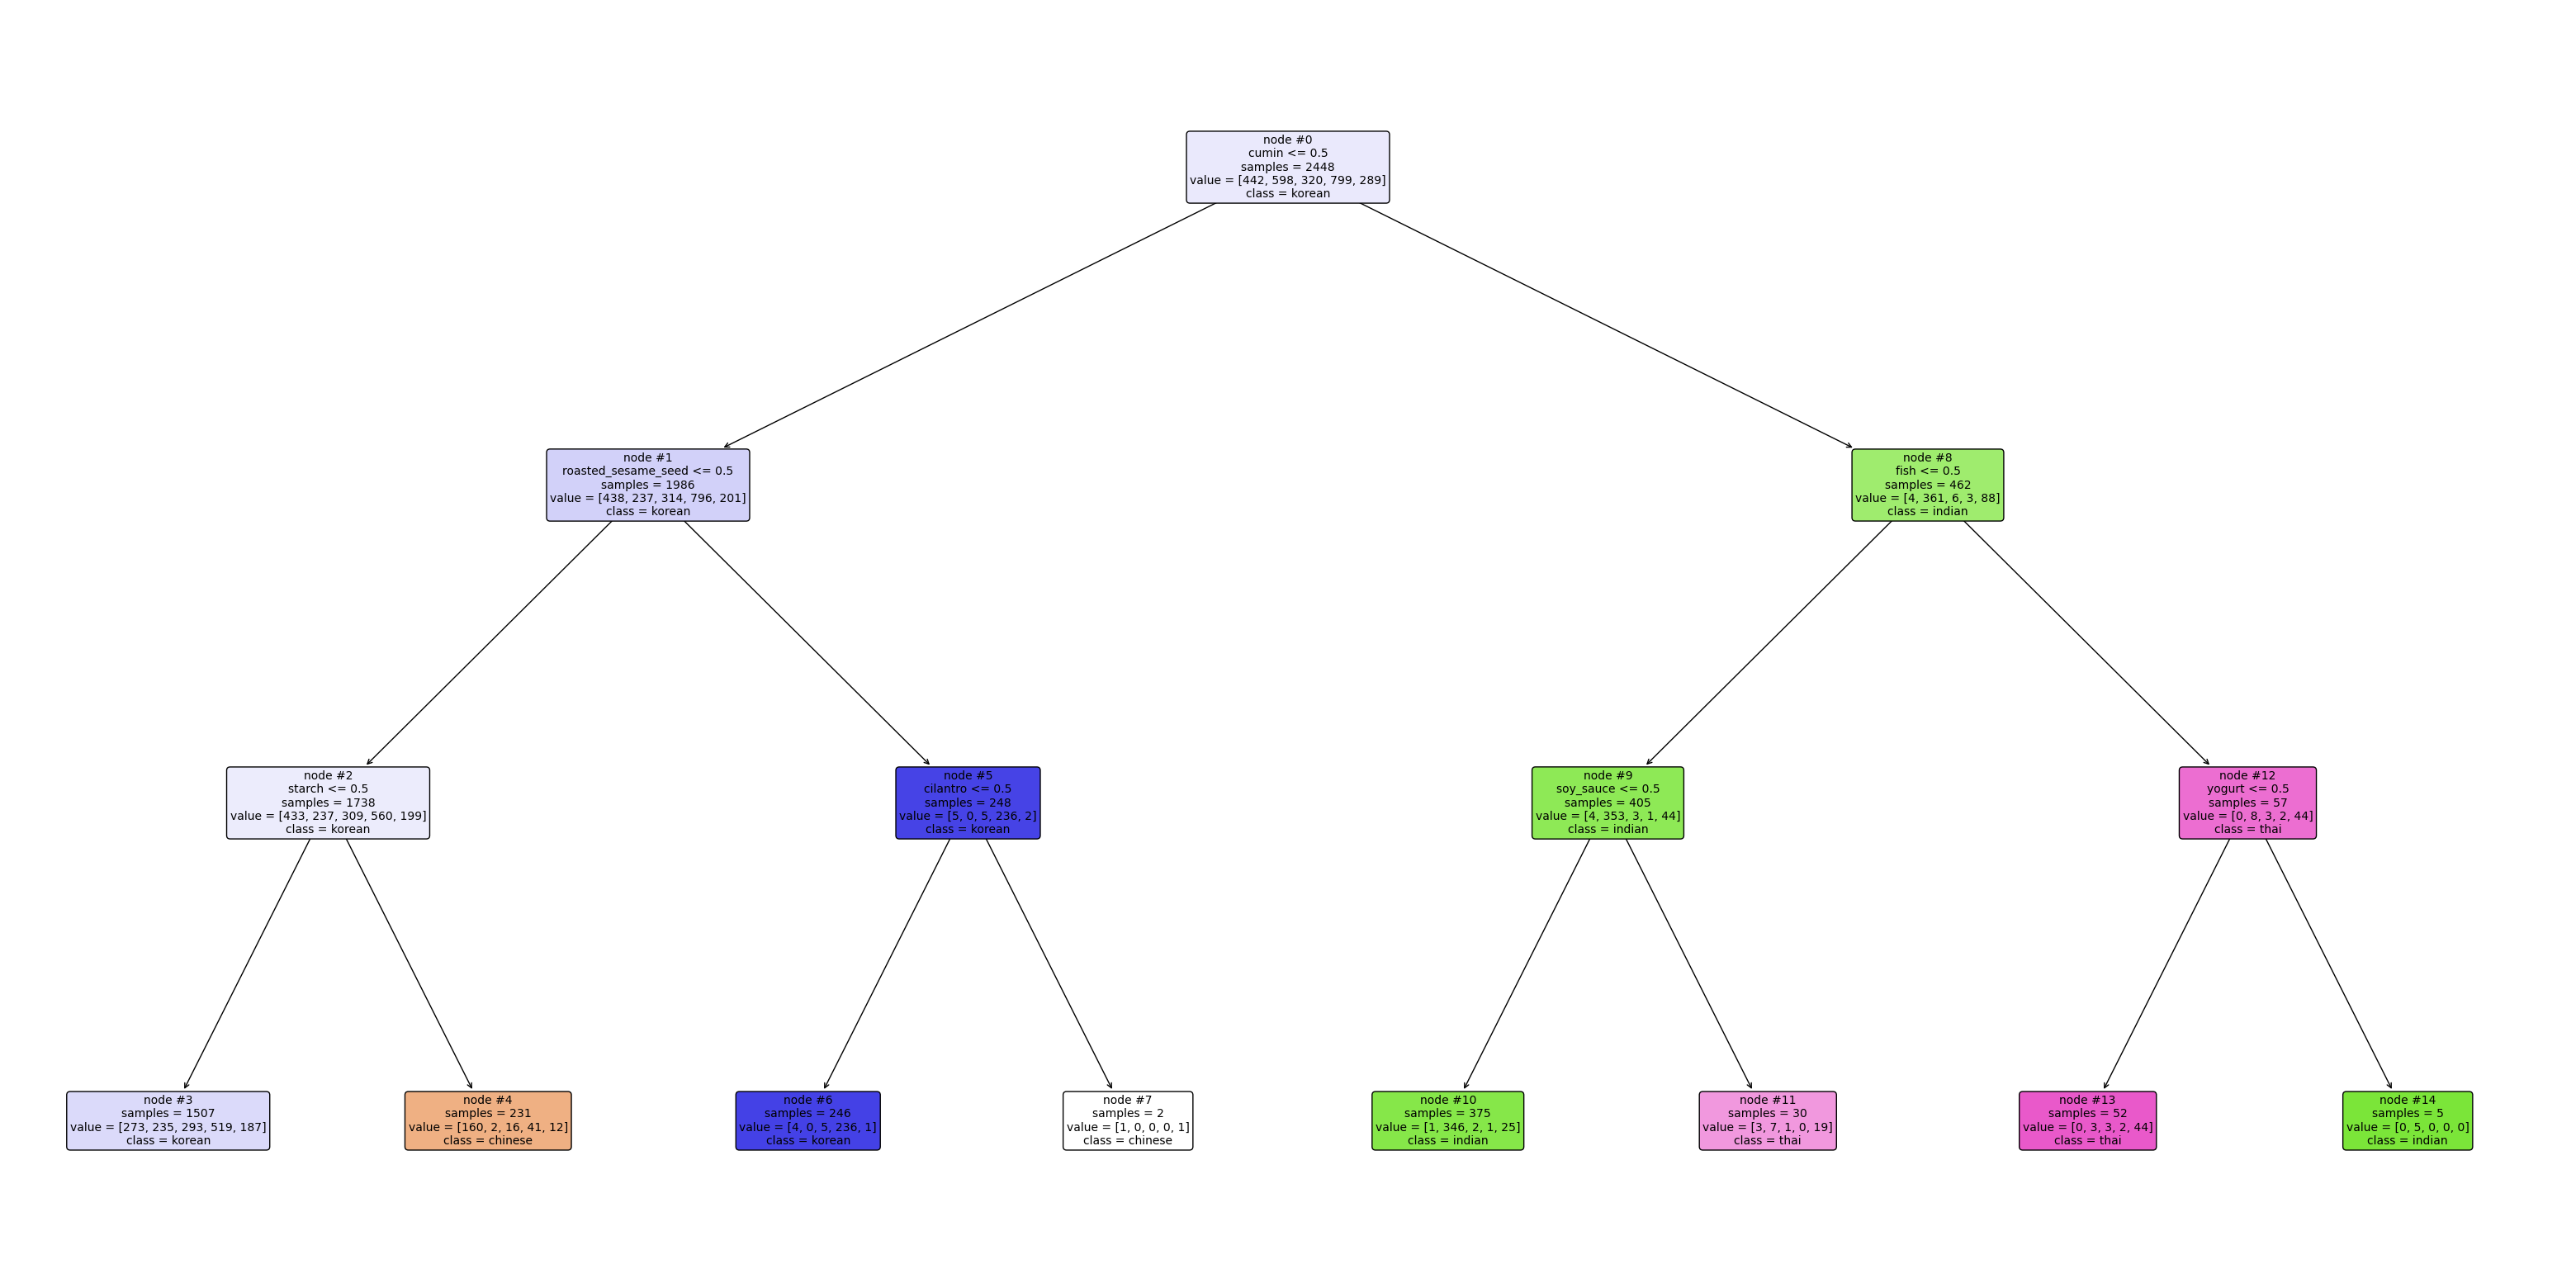

In [41]:
# Plot the Decision Tree
plt.figure(figsize=(40,20))  # Let's plot the decision tree and examine how it looks like; customize size  according to the size of your tree
_ = tree.plot_tree(bamboo_tree,
                   feature_names = list(ingredients.columns.values),
                   class_names=np.unique(cuisines),filled=True,
                   node_ids=True,
                   impurity=False,
                   label="all",
                   fontsize=10, rounded = True)
plt.show()


# PART 3: Evaluate the model

In [42]:
# Create a new dataframe using only the data pertaining to the Asian and the Indian cuisines, and call the new dataframe bamboo.
bamboo = recipes[recipes.cuisine.isin(["korean", "japanese", "chinese", "thai", "indian"])]

In [58]:
# See how many recipes exist for each cuisine.
print (bamboo["cuisine"].value_counts())
print(bamboo.shape) # so we have 2,448 recipes for 5 different cusines with 384 ingredients

korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: cuisine, dtype: int64
(2448, 384)


In [48]:
# Create a subset dataframe from bamboo containing only 30 recipes from each cuisine and let's name this test set bamboo_test.
# Set sample size
sample_n = 30

random.seed(1234) # set random seed to a fixed value of 1234. This is done so that the results of any random processes used later in the code will be reproducible.
# reproducable means that whenever you run this code, it will fix the same numbers sampled in the training set, so we get the same result every time

# This below codeline performs 2 operations (1) groupby and (2) apply
# the groupby and apply methods are used together to split the "bamboo" DataFrame into groups based on the unique values in the "cuisine" column,
# and then apply a function (in this case, the lambda function) to each group.
# The 'groupby' is used to group the rows in the bamboo DataFrame by cuisine
# "group_keys=False" argument specifies that the keys used to group the data should not be included in the resulting dataframe.
# The lambda function randomly samples sample_n (a fixed number) rows from each group.

bamboo_test = bamboo.groupby("cuisine", group_keys=False).apply(lambda x: x.sample(sample_n))

In [51]:
bamboo_test_ingredients = bamboo_test.iloc[:,1:] # creating a DataFrame by selecting all rows and all columns except the first (the column containing the cuisine labels).
# print(bamboo_test_ingredients.head())
# iloc stands for integor location
bamboo_test_cuisines = bamboo_test["cuisine"] # Creating a new Series by selecting only the first column of bamboo_test DataFrame

In [52]:
# check that we have 30 recipes from each cuisine
print(bamboo_test["cuisine"].value_counts())

chinese     30
indian      30
japanese    30
korean      30
thai        30
Name: cuisine, dtype: int64


In [66]:
# Next, let's create the training (subset) set for all remaining data in bamboo (other than bamboo_test; i.e., other than the 30 samples from each cuisine)
bamboo_test_index = bamboo.index.isin(bamboo_test.index) 

print(bamboo_test_index)
print(len(bamboo_test_index)) # So, we have a total of 2,448 recipies (all data)
bamboo_train = bamboo[~bamboo_test_index] # this"~" means choose everything from bamboo dataframe that is NOT in the bamboo_test
print(len(bamboo_train))# So, we have 2,298 recipes for training (i.e., extracting 30 x 5=150)

[False False False ... False False False]
2448
2298


# Now, get the output feature and input features for the training sets:

In [68]:
# Get the input features, i.e., ingredients
bamboo_train_ingredients = bamboo_train.iloc[:,1:] 
# bamboo_train.iloc[:,1:] creates a new DataFrame bamboo_train_ingredients that includes
# all columns of the bamboo_train DataFrame except the first column (which contains the cuisine labels)
bamboo_train_ingredients.to_csv('IBM Courses/Course 3-Data Science Methodology/training_set.csv', sep=',',index=False)

# Get the output feature for the training decision tree , i.e., cuisines 
bamboo_train_cuisines = bamboo_train["cuisine"] 
# creates a new Series bamboo_train_cuisines that contains the cuisine labels for each recipe in the training set

## Now let's build the training set, called bamboo_train_tree for prediction

In [73]:
bamboo_train_tree = tree.DecisionTreeClassifier(max_depth=15) # creates a decision tree of max depth of 15; i.e., this is our model!!!!
bamboo_train_tree.fit(bamboo_train_ingredients, bamboo_train_cuisines) #its the decision tree model to the training data. The fit() method takes two arguments:
# bamboo_train_ingredients, which contains the ingredients for each recipe in the training set, and bamboo_train_cuisines, which contains the corresponding cuisine labels.

DecisionTreeClassifier(max_depth=15)

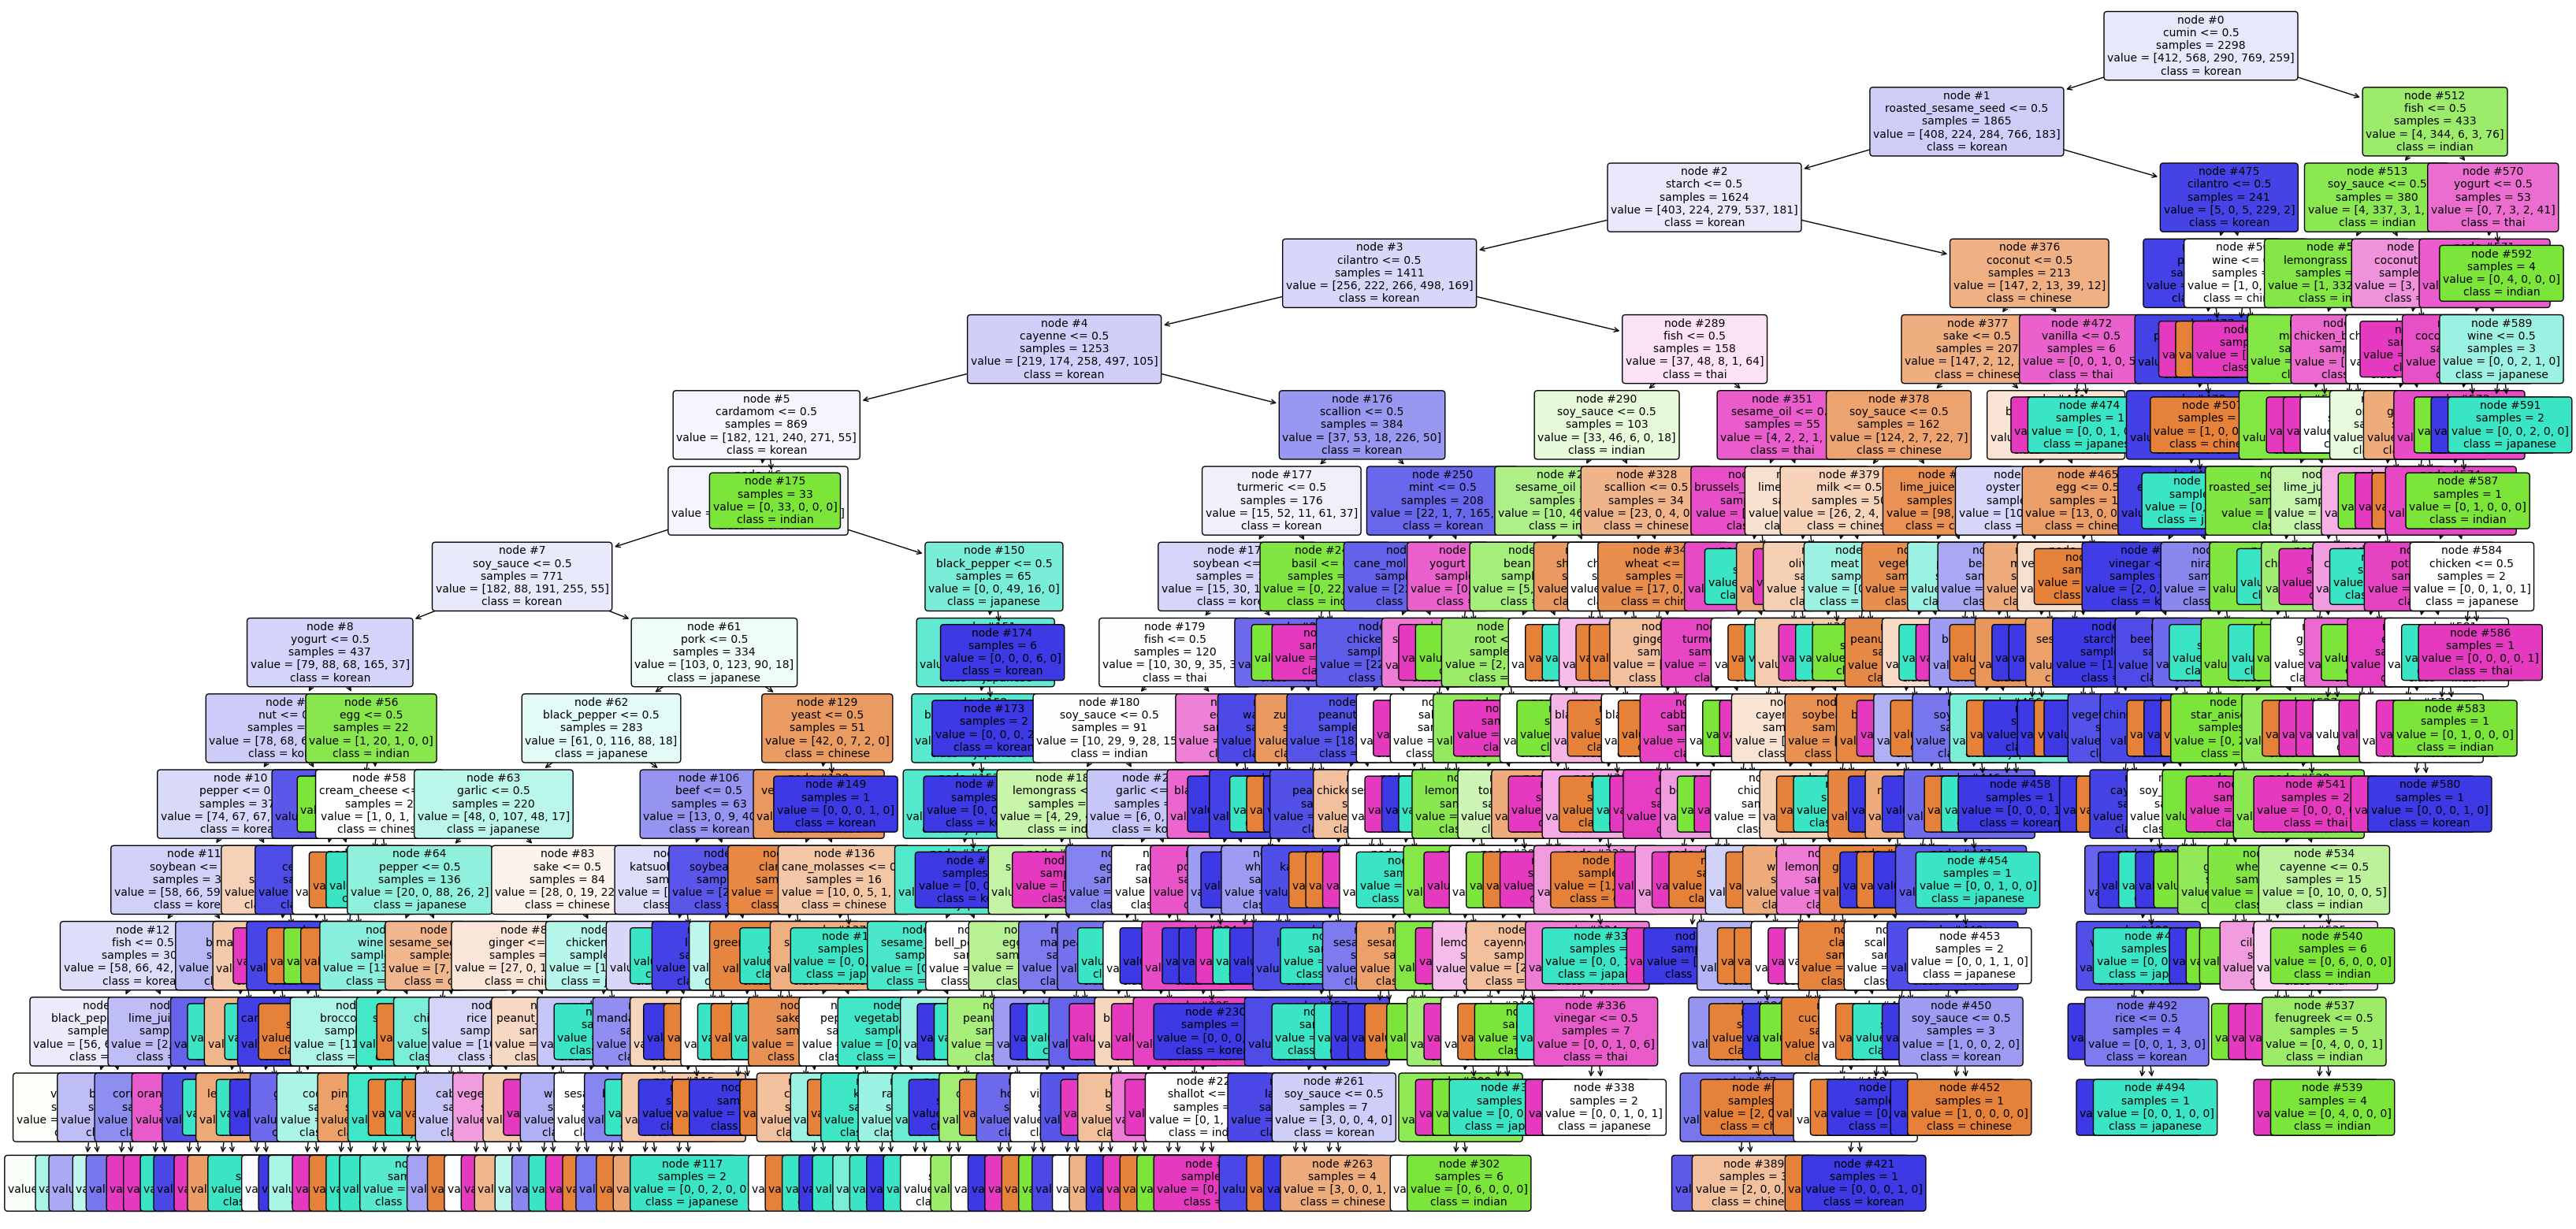

In [74]:

# Plot the decision tree
plt.figure(figsize=(40,20))  # customize according to the size of your tree
_ = tree.plot_tree(bamboo_train_tree,
                   feature_names=list(bamboo_train_ingredients.columns.values),
                   class_names=np.unique(bamboo_train_cuisines),
                   filled=True,
                   node_ids=True,
                   impurity=False,
                   label="all",
                   fontsize=10, rounded = True)
plt.show()

## Now, we will test our model on the test data

In [76]:
 # here, we are predicting the output feature (which cuisine) based on the input data (ingredients) for the test set
bamboo_pred_cuisines = bamboo_train_tree.predict(bamboo_test_ingredients)

## PART 3.a: Evaluate the Model using a Confusion Matrix

In [77]:
## To quantify how well the decision tree is able to determine the cuisine of each recipe correctly,
##  we will create a confusion matrix which presents a nice summary on how many recipes from each cuisine are correctly classified.
#  It also sheds some light on what cuisines are being confused with what other cuisines.

test_cuisines = np.unique(bamboo_test_cuisines) # Returns the sorted unique (no repetition) elements of an array; np is an alias for numpy

In [80]:
## This is the command line that creates the confusion matrix !!!!!! This command is from sklearn.metrics module of the sklearn library
bamboo_confusion_matrix = confusion_matrix(bamboo_test_cuisines, bamboo_pred_cuisines, labels = test_cuisines)
title = 'Bamboo Confusion Matrix'
cmap = plt.cm.Blues # cmap is short for color map, it is a command of  one of the modules of matplotlib, this module is matplotlib.cm (for color maps)
# The Blues colormap ranges from light blue to dark blue, with lighter values indicating smaller values and darker values indicating larger values

plt.figure(figsize=(8, 6)) # Here, we're not yet plotting, we're just defining the plot

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [84]:
# Below, we are normalizing a confusion matrix by dividing each element in the matrix by the sum of the corresponding row
# We specify that the element type is a float (not an integer)
# The sum() method is called with the axis parameter set to 1 to sum the values of each row
# [:, np.newaxis]  is used to ensure that the resulting array is a column vector, which will allow the division operation to be broadcasted across the matrix
bamboo_confusion_matrix = (
    bamboo_confusion_matrix.astype('float') / bamboo_confusion_matrix.sum(axis=1)[:, np.newaxis]
    ) * 100


## The confusion matrix, represented by the below variable bamboo_confusion_matrix, is a square matrix, used to evaluate the classification model. It compares the actual class labels with the predicted class labels of a classifier

## Now for some adjusting of the confusion matrix

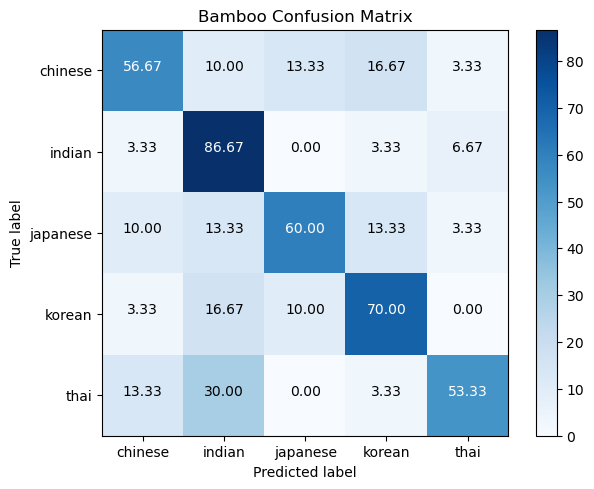

In [85]:
plt.imshow(bamboo_confusion_matrix, interpolation='nearest', cmap=cmap) # imshow displays a 2D array as an image.
# the argument "cmap = cmap" specifies the color scheme to be the same as that defined earlier in "cmap", to map the values of "bamboo_confusion_matrix based on colors

plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(test_cuisines))
plt.xticks(tick_marks, test_cuisines)
plt.yticks(tick_marks, test_cuisines)

fmt = '.2f' # This fmt variable sets the format of the number labels to two decimal places.
thresh = bamboo_confusion_matrix.max() / 2. # threshold for determining color of text labels (max/2);
# If the value in a cell of the confusion matrix is greater than the threshold, the text label will be white, otherwise it will be black.
for i, j in itertools.product(range(bamboo_confusion_matrix.shape[0]), range(bamboo_confusion_matrix.shape[1])): # this returns the product,
    # the library here is itertools and itertools.product is a module of this library
    plt.text(j, i, format(bamboo_confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if bamboo_confusion_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

In [86]:
print("Accuracy Score is ", accuracy_score(bamboo_test_cuisines,bamboo_pred_cuisines))

Accuracy Score is  0.6533333333333333


# Analysis of the output confusion matrix

The y_axis is the true label (i.e., what the cuisine really is) and the x_axis is the predicted label (what is teh predicted cuisin)
The rows represent the actual cuisines from the dataset and the columns represent the predicted ones. Each row should sum to 100%. According to this confusion matrix, we make the following observations:
Using the first row in the confusion matrix, 73% of the Chinese recipes in bamboo_test were correctly classified by our decision tree whereas 20% of the Chinese recipes were misclassified as Korean and 3% were misclassified as Indian.
Using the Indian row, 77% of the Indian recipes in bamboo_test were correctly classified by our decision tree and 3% of the Indian recipes were misclassified as Chinese and 13% were misclassified as Korean and 7% were misclassified as Thai.
